In [ ]:
# !pip install yfinance

In [1]:
import yfinance as yf
import datetime as dt
from dateutil.relativedelta import relativedelta

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
# from keras.src.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [6]:
endDate = dt.datetime.today()-relativedelta(years=20)
startDate = endDate-relativedelta(years=40)
ticker = 'MSFT'

In [7]:
df = yf.download(ticker, startDate, endDate)
# url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
# df = pd.read_csv(url)
df.sort_index(axis=0, ascending=True, inplace=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4528 entries, 1986-03-13 to 2004-02-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4528 non-null   float64
 1   High       4528 non-null   float64
 2   Low        4528 non-null   float64
 3   Close      4528 non-null   float64
 4   Adj Close  4528 non-null   float64
 5   Volume     4528 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 247.6 KB


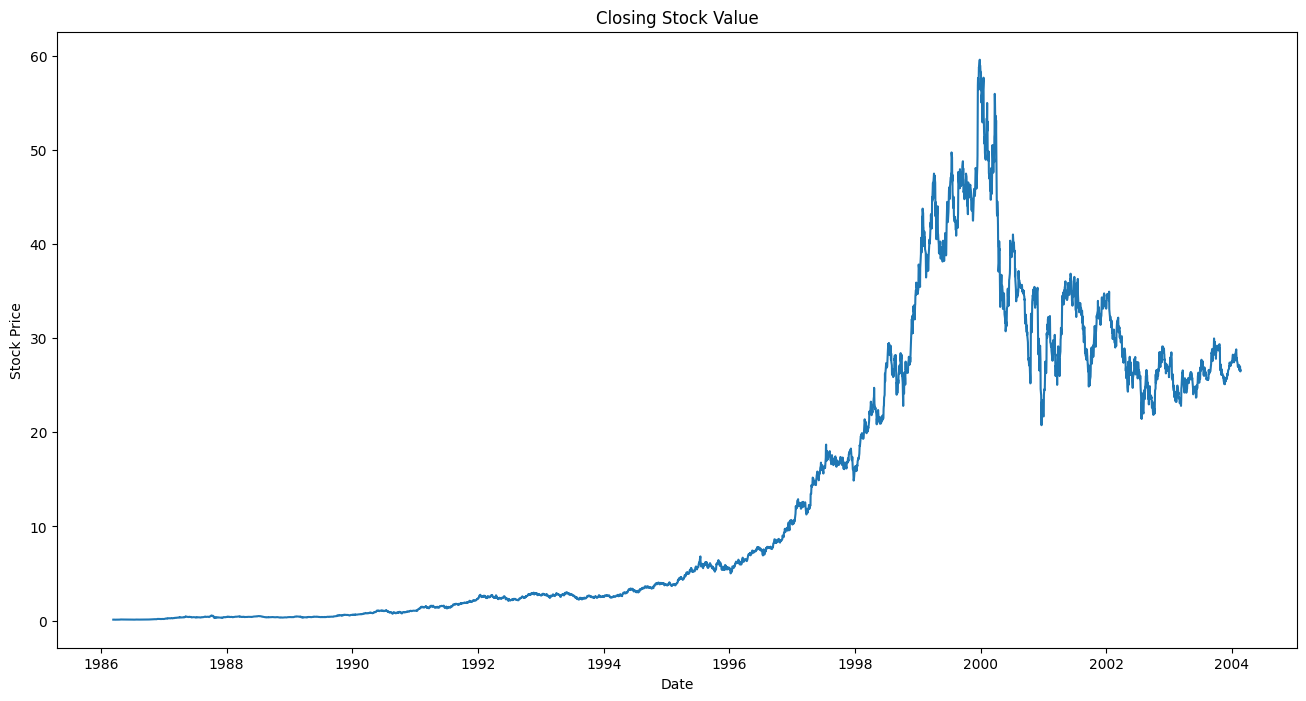

In [9]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Closing Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [10]:
input=150
prices = df['Close'].values

xPrices = []
yPrices = []
for i in range(len(prices)-input):
  xPrices.append(prices[i:i+input])
  yPrices.append(prices[i+input])

xTrain, xTest, yTrain, yTest = train_test_split(xPrices, yPrices, test_size=0.2, shuffle=False)
yTrain = np.asarray(yTrain).reshape(-1, 1)
yTest = np.asarray(yTest).reshape(-1, 1)

sc = MinMaxScaler(copy=False)
xTrain = sc.fit_transform(xTrain).reshape(-1, input, 1)
xTest = sc.transform(xTest).reshape(-1, input, 1)
yTrain = sc.fit_transform(yTrain)
yTest = sc.transform(yTest)

xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((3502, 150, 1), (3502, 1), (876, 150, 1), (876, 1))

In [11]:
# input=10
# batchSize=10
# seriesData=TimeseriesGenerator(train, train, length=input, batch_size=batchSize, )

In [12]:
model = Sequential()
model.add(LSTM(units=10, return_sequences = False, input_shape=(input, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [20]:
 history = model.fit(xTrain, yTrain, batch_size=16, epochs=40, validation_split=0.25, verbose=2, shuffle=False)

Epoch 1/40
165/165 - 13s - loss: 9.4052e-05 - mse: 9.4052e-05 - val_loss: 0.0357 - val_mse: 0.0357 - 13s/epoch - 80ms/step
Epoch 2/40
165/165 - 10s - loss: 6.4053e-04 - mse: 6.4053e-04 - val_loss: 0.0135 - val_mse: 0.0135 - 10s/epoch - 60ms/step
Epoch 3/40
165/165 - 9s - loss: 2.7031e-04 - mse: 2.7031e-04 - val_loss: 0.0010 - val_mse: 0.0010 - 9s/epoch - 52ms/step
Epoch 4/40
165/165 - 9s - loss: 1.2389e-04 - mse: 1.2389e-04 - val_loss: 0.0109 - val_mse: 0.0109 - 9s/epoch - 58ms/step
Epoch 5/40
165/165 - 10s - loss: 7.6594e-05 - mse: 7.6594e-05 - val_loss: 0.0052 - val_mse: 0.0052 - 10s/epoch - 58ms/step
Epoch 6/40
165/165 - 10s - loss: 6.5845e-05 - mse: 6.5845e-05 - val_loss: 0.0045 - val_mse: 0.0045 - 10s/epoch - 58ms/step
Epoch 7/40
165/165 - 9s - loss: 6.3193e-05 - mse: 6.3193e-05 - val_loss: 0.0054 - val_mse: 0.0054 - 9s/epoch - 52ms/step
Epoch 8/40
165/165 - 10s - loss: 8.6099e-05 - mse: 8.6099e-05 - val_loss: 0.0160 - val_mse: 0.0160 - 10s/epoch - 58ms/step
Epoch 9/40
165/165 - 9

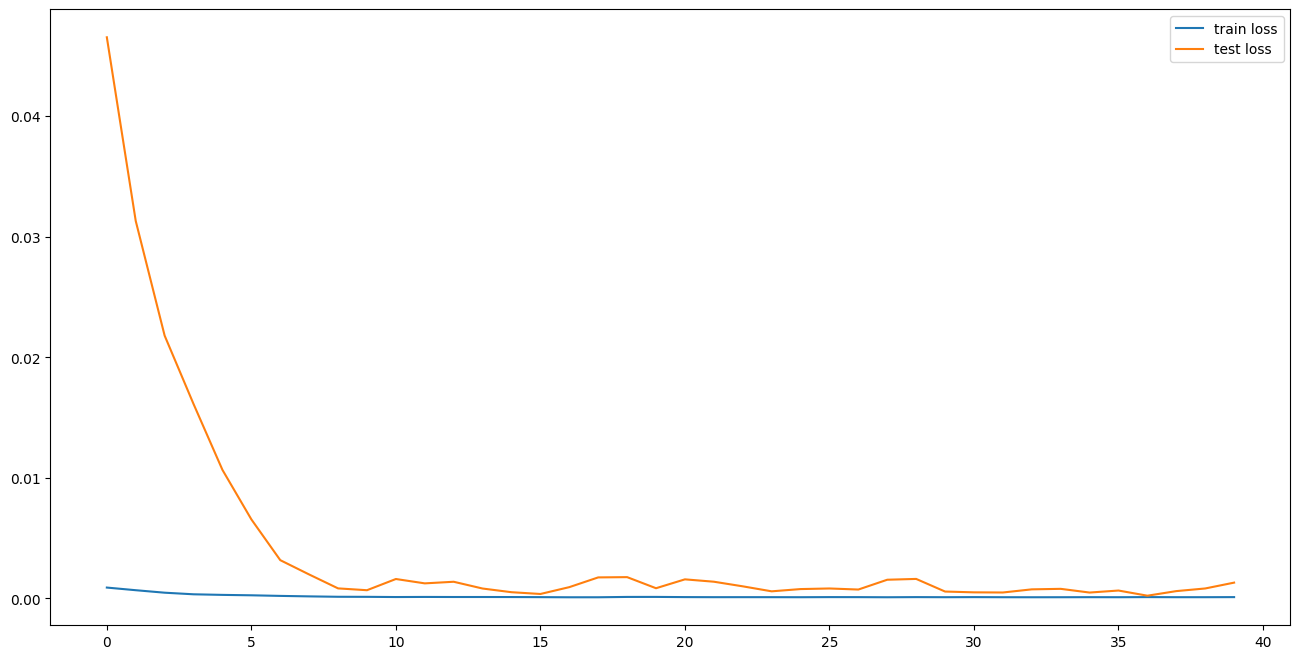

In [ ]:
# plt.figure(figsize=(16, 8))
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='test loss')
# plt.legend()
# plt.show()

In [21]:
trainPredictions = model.predict(xTrain)
trainPredictions = sc.inverse_transform(trainPredictions)
trainScore = np.sqrt(mean_squared_error(yTrain, trainPredictions))
print('Train Score: %.6f RMSE' % (trainScore))


110/110 [==============================] - 1s 12ms/step
Train Score: 17.347270 RMSE


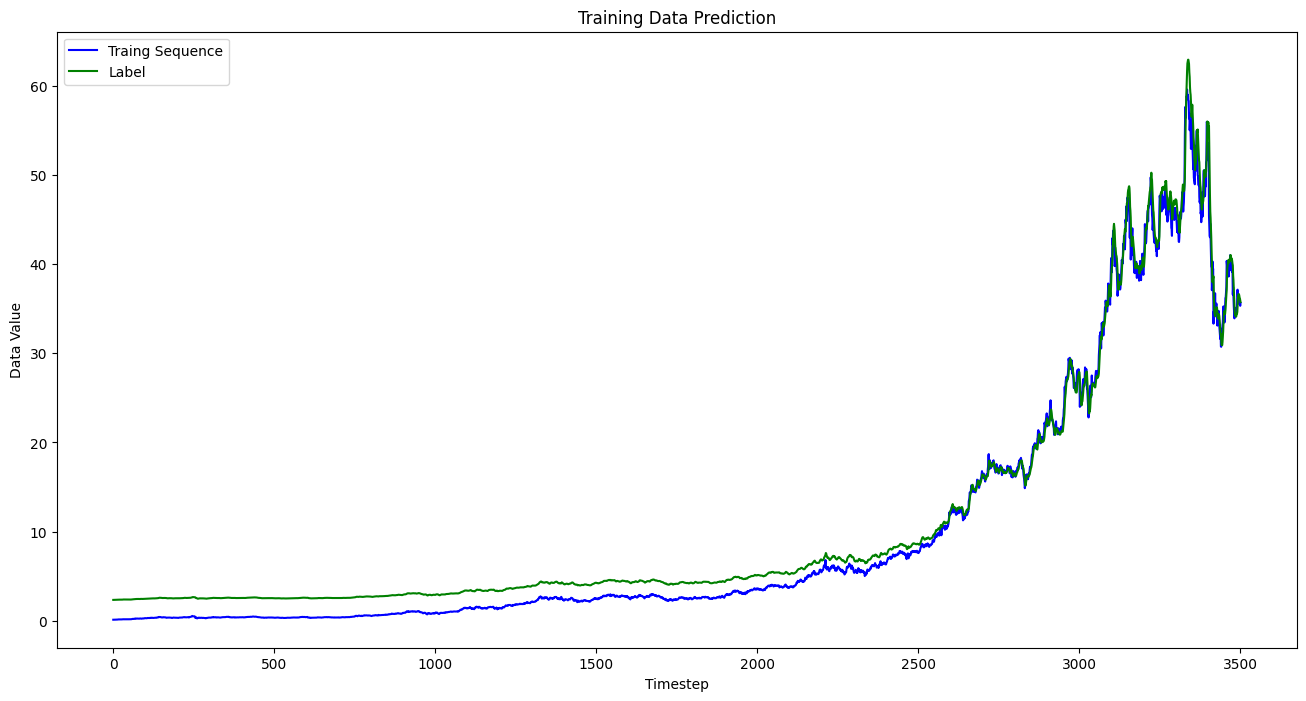

In [22]:
plt.figure(figsize=(16,8))
plt.plot(prices[input:len(yTrain)+input], color = 'blue', label = 'Traing Sequence')
plt.plot(trainPredictions, color = 'green', label = 'Label')
plt.title('Training Data Prediction')
plt.ylabel('Data Value')
plt.xlabel('Timestep')
plt.legend()
plt.show()

In [23]:
testPredictions = model.predict(xTest)
testPredictions = sc.inverse_transform(testPredictions)
testScore = np.sqrt(mean_squared_error(yTest, testPredictions))
print('Test Score: %.6f RMSE' % (testScore))

28/28 [==============================] - 0s 12ms/step
Test Score: 28.012058 RMSE


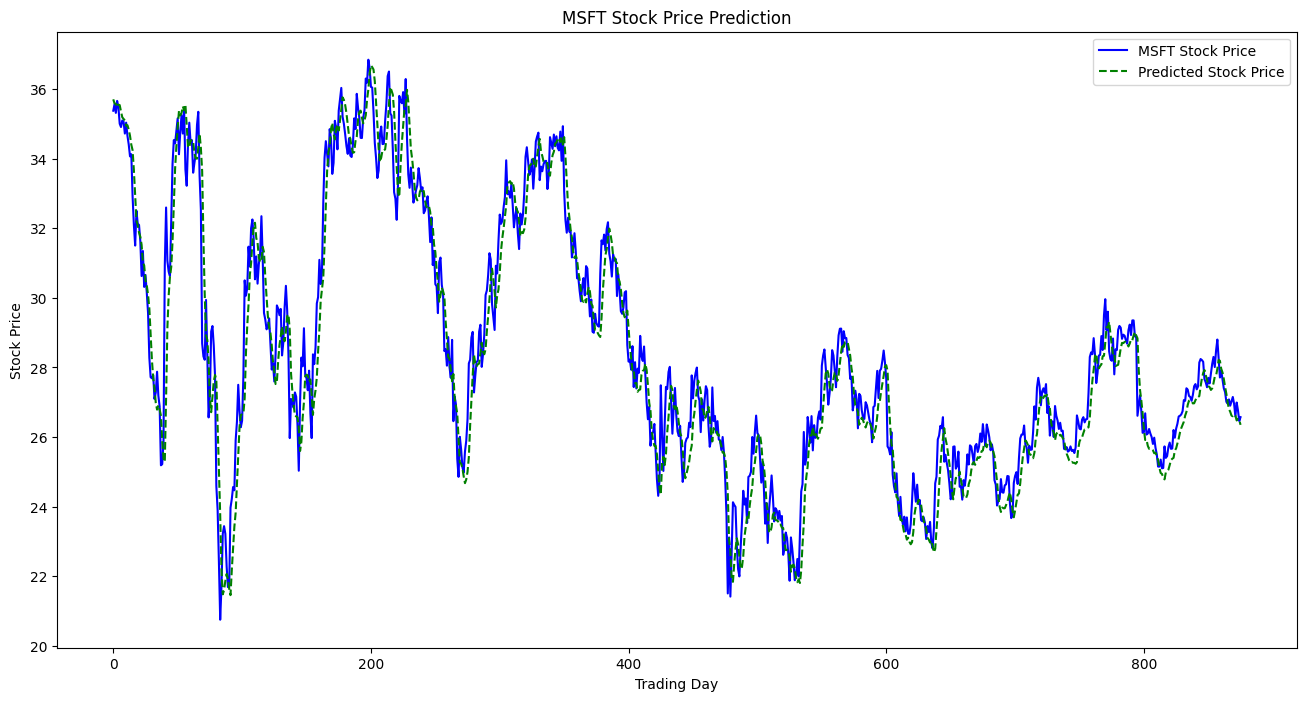

In [24]:
plt.figure(figsize=(16,8))
plt.plot(prices[-len(yTest):], color = 'blue', label = f'{ticker} Stock Price')
plt.plot(testPredictions, 'g--', label = 'Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

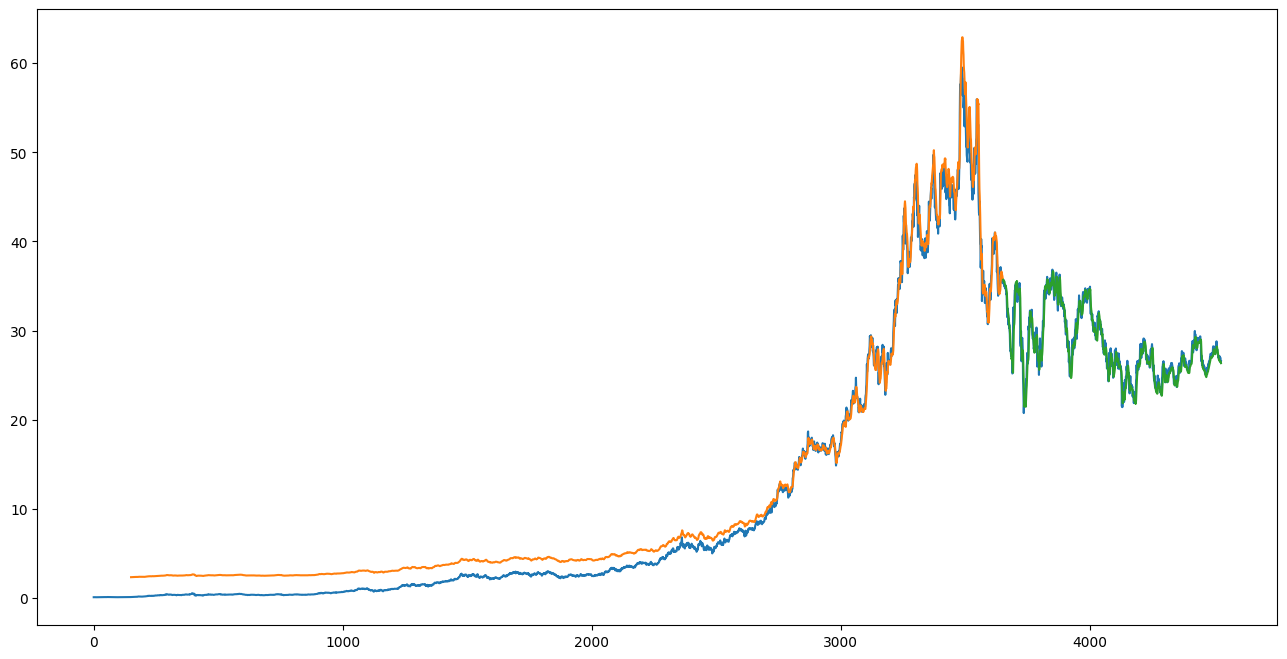

In [25]:
plt.figure(figsize=(16,8))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(prices.reshape(-1, 1))
trainPredictPlot[:, :] = np.nan
trainPredictPlot[input:len(trainPredictions)+input, :] = trainPredictions
# shift test predictions for plotting
testPredictPlot = np.empty_like(prices.reshape(-1, 1))
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredictions)+input:, :] = testPredictions
# plot baseline and predictions
plt.plot(prices)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()